### Make a copy of this note if you want to analyze 

#### Please run panta first to get gene clusters and other output files for this analysis

In [1]:
## Don't use this anymore: starting using scaffolding_workflow.ipynb

In [13]:
import pandas as pd
from scipy.sparse import csr_matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import sys, re
from pangraph.utils import write_fasta
from networkx import NetworkXNoPath
import os
from pangraph.utils import overlap, reverse_complement

In [14]:
def max_common_subsequene(a, b):
    result = np.zeros((len(a), len(b)))
    max_value = 0; best_max = 0
    for i in range(len(a)):
        for j in range(len(b)):
            if (a[i]==b[j]):
                result[i,j] = result[i-1,j-1]+1 #remember to initialize the borders with zeros
            else:
                result[i,j]=0
    print(np.amax(result))

In [15]:
# simversion = '_v3'
# simversion = '_Kp100random_v01'
# simversion = '_Kp500random_v03'
simversion = '_Ecoli100random_plasmid_v01'

In [34]:
# data_dir = "../panta/examples/test/output/"
# data_dir = "data/genome_graph_test/"
# you can take the data in the directory: data/genome_graph_test
# data_dir = "../panta/examples/test/output_Kp30plus1/"
# data_dir = "../panta/examples/test/output_Kp100/"
# data_dir = '/data/hoan/amromics/panta/examples/test/output_Kp100_v3/'
# data_dir = '/data/hoan/amromics/panta/examples/test/output_Kp100random_v01/'
# data_dir = '/data/hoan/amromics/panta/examples/test/output_Kp500random_v03/'
# data_dir = '/data/hoan/amromics/panta/examples/test/output_Ecoli100random_plasmid_v01/'
data_dir = '/data/hoan/amromics/panta/examples/test/pantaOut_Ecoli50random_Ecolitest_GCF_004135915_plasmid_v01/'
data_dir = '/data/hoan/amromics/panta/examples/test/pantaOut_Ecoli50random_Ecolitest_GCF_004135915_plasmid_v01/'
# data_dir = "../panta/examples/test/output_Kp30mix_nosplitparalog/"
# data_dir = "../panta/examples/test/output_Kp500mix/"
# data_dir = "/data/hoan/amromics/simulation/art_output/spades_output/panta_output/"

In [35]:
sample_info = pd.read_csv(data_dir + "samples.tsv", delimiter='\t', header=None)
sample_info.columns = ['Name', 'SampleID']

In [36]:
sample_info

,Name,SampleID
0,GCF_000010245.2_ASM1024v1_genomic,0
1,GCF_000493755.1_ASM49375v1_genomic,1
2,GCF_001644725.1_ASM164472v1_genomic,2
3,GCF_001900985.1_ASM190098v1_genomic,3
4,GCF_001901025.1_ASM190102v1_genomic,4
5,GCF_002057245.1_ASM205724v1_genomic,5
6,GCF_002741255.1_ASM274125v1_genomic,6
7,GCF_002741455.1_ASM274145v1_genomic,7
8,GCF_002787645.1_ASM278764v1_genomic,8
9,GCF_002811555.3_ASM281155v3_genomic,9


In [37]:
gene_info = pd.read_csv(data_dir + "gene_info.tsv", delimiter='\t', header=None)
gene_info.columns =['GeneName', 'SampleID', 'clusterID']

In [38]:
gene_info.head(2)

,GeneName,SampleID,clusterID
0,GCF_000010245.2_ASM1024v1_genomic-NC_007779.1-...,0,0
1,GCF_000010245.2_ASM1024v1_genomic-NC_007779.1-...,0,1


In [39]:
gene_position = pd.read_csv(data_dir + 'gene_position.tsv', delimiter='\t', header=None)
gene_position.columns =['SampleID', 'ContigName', 'GeneSequence']

In [40]:
gene_position.head()

,SampleID,ContigName,GeneSequence
0,0,NC_007779.1,GCF_000010245.2_ASM1024v1_genomic-NC_007779.1-...
1,1,NC_022648.1,GCF_000493755.1_ASM49375v1_genomic-NC_022648.1...
2,1,NC_022661.1,GCF_000493755.1_ASM49375v1_genomic-NC_022661.1...
3,1,NC_022649.1,GCF_000493755.1_ASM49375v1_genomic-NC_022649.1...
4,1,NC_022662.1,GCF_000493755.1_ASM49375v1_genomic-NC_022662.1...


In [41]:
for v in gene_position[gene_position.SampleID==49]['ContigName']:
    print(v)

NODE_1_length_488582_cov_18.874345
NODE_2_length_349339_cov_18.811620
NODE_3_length_331083_cov_18.847279
NODE_4_length_240939_cov_18.946119
NODE_5_length_237350_cov_18.948988
NODE_6_length_223229_cov_18.815202
NODE_7_length_167029_cov_18.922892
NODE_8_length_161199_cov_18.826863
NODE_9_length_160033_cov_18.941248
NODE_10_length_158869_cov_18.840820
NODE_11_length_142436_cov_18.809343
NODE_12_length_137153_cov_18.881151
NODE_13_length_135581_cov_18.865841
NODE_14_length_134559_cov_18.984075
NODE_15_length_123707_cov_18.714982
NODE_16_length_120538_cov_18.884747
NODE_17_length_117783_cov_18.726590
NODE_18_length_116983_cov_18.779830
NODE_19_length_109091_cov_18.821435
NODE_20_length_108485_cov_19.022475
NODE_21_length_104511_cov_18.847170
NODE_22_length_104266_cov_18.619589
NODE_23_length_103896_cov_18.912279
NODE_24_length_96319_cov_18.663436
NODE_25_length_75424_cov_19.008425
NODE_26_length_74104_cov_18.511148
NODE_27_length_66313_cov_19.073606
NODE_28_length_56011_cov_18.488455
NODE_2

In [43]:
# gene_position[gene_position.SampleID==49]

In [13]:
# print(gene_position.ContigName.values)

In [14]:
# gene_position[gene_position.SampleID==0].head(2)

In [15]:
# sort by length of contigs
gene_position.sort_values(by="GeneSequence", key=lambda x: x.str.len(),  ascending=False, inplace=True)

In [16]:
print("List of all samples")
n_samples = len(np.unique(gene_position.iloc[:,0]))
np.unique(gene_position.iloc[:,0])

List of all samples


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [17]:
# ## select some sample
# selected_samples = [0, 32]
# sample_info = sample_info.loc[sample_info['SampleID'].isin(selected_samples)]
# gene_info = gene_info.loc[gene_info['SampleID'].isin(selected_samples)]
# gene_position = gene_position.loc[gene_position['SampleID'].isin(selected_samples)]

## Construct pangraph

In [18]:
%load_ext autoreload
%autoreload 2
from pangraph import PanGraph

In [19]:
# construct the pangenome graph
# min_contig_len = 100
pangraph = PanGraph(sample_info=sample_info, gene_info=gene_info, gene_position=gene_position)

In [20]:
incomplete_sample_name = "g1"
incomplete_sample_id = sample_info[sample_info.Name==incomplete_sample_name].iloc[0,1]
# H = pangraph.construct_graph(method = "graph_alignment", sample_id_ref = None,  min_nucleotides = 90, min_genes = 0, 
#                             target_genome_id=incomplete_sample_id) # use the same min_contig_len when generate the ground truth
H = pangraph.construct_graph(method = "graph_alignment", sample_id_ref = 1,  min_nucleotides = 90, min_genes = 0, target_genome_id=incomplete_sample_id) # use the same min_contig_len when generate the ground truth

Set minimum on number of nucleotides =  90 NUMBER OF COMPUTED CONTIGS: 462
Clip the matrixn 0.2 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [21]:
# nx.write_gml(H,'cytoscape_out/pan_graph.gml')

In [22]:
# number of nodes and edges
pangraph.n_clusters, H.number_of_edges()

(495308, 4913)

## Data analysis

In [23]:
from pangraph.utils import append_strand, append_strand_undirected

In [24]:
from pangraph.utils import getContigsAdjacency
edge_list_assembly = []
undirected_edge_list_assembly = []
# for l,r in getContigsAdjacency('/data/hoan/amromics/spades_quast/SAMN04158282/'):
for l,r in getContigsAdjacency('/data/hoan/amromics/simulation/art_output/spades_output' + simversion):
    # print("{} --> {}".format(l,r))
    edge_list_assembly.append((append_strand(l),append_strand(r)))
    # undirected_edge_list_assembly.append((append_strand_undirected(l), append_strand_undirected(r)))

assembly_graph= nx.DiGraph()
assembly_graph.add_edges_from(edge_list_assembly)
nx.write_gml(assembly_graph,'/data/hoan/amromics/simulation/art_output/spades_output'+simversion+'/assembly_graph.gml')

In [25]:
len(list(nx.weakly_connected_components(assembly_graph)))

51

In [26]:
from pangraph.utils import getContigsAdjacency_v2
edge_list_assembly = []
undirected_edge_list_assembly = []
# for l,r in getContigsAdjacency('/data/hoan/amromics/spades_quast/SAMN04158282/'):
for l,r in getContigsAdjacency_v2('/data/hoan/amromics/simulation/art_output/spades_output' + simversion):
    # print("{} --> {}".format(l,r))
    edge_list_assembly.append((append_strand(l),append_strand(r)))
    # undirected_edge_list_assembly.append((append_strand_undirected(l), append_strand_undirected(r)))

assembly_graph= nx.DiGraph()
assembly_graph.add_edges_from(edge_list_assembly)
nx.write_gml(assembly_graph,'/data/hoan/amromics/simulation/art_output/spades_output'+simversion+'/assembly_graph.gml')

In [27]:
from pangraph.utils import buildOverlapEdge
from pangraph.utils import read_contigs2dict
gene = read_contigs2dict('/data/hoan/amromics/simulation/art_output/spades_output'+simversion+'/contigs.fasta')
# edge_list_overlap = buildOverlapEdge(gene, 20)
edge_list_overlap = buildOverlapEdge(gene, 20, 'directed')
# undirected_edge_list_overlap = buildOverlapEdge(gene, 20, 'undirected')

In [28]:
# edge_list_overlap

In [29]:
# print("Take union of two graph!!")
edge_list_final = edge_list_overlap + edge_list_assembly
# edge_list_final = edge_list_assembly
# undirected_edge_list_final =  undirected_edge_list_assembly + undirected_edge_list_overlap

In [30]:
assembly_graph= nx.DiGraph()
assembly_graph.add_edges_from(edge_list_final)
# undirected_assembly_graph= nx.Graph()
# undirected_assembly_graph.add_edges_from(undirected_edge_list_final)
nx.write_gml(assembly_graph,'/data/hoan/amromics/simulation/art_output/spades_output'+simversion+'/overlap_graph.gml')

In [31]:
L = list(nx.weakly_connected_components(assembly_graph))

In [32]:
len(L)

1

### Manual checking

In [33]:
# for idx in gene_position.iloc[:,1]:
#     if idx[:4]=='NODE':
#         print(idx, end = ',')

In [34]:
# # assembly_graph.has_edge('NODE_1_length_360583_cov_9.851928', 'NODE_2_length_327037_cov_9.679695')
# node1 = 'NODE_30_length_58501_cov_29.181877+'
# node2 = 'NODE_45_length_13325_cov_30.337076-'
# source_id = 'C-' + str(pangraph.tail_contig[node1[:-1]])
# target_id = 'C-' + str(pangraph.head_contig[node2[:-1]])  
# assembly_graph.has_node(node1), assembly_graph.has_node(node2), 

In [35]:
# # nx.shortest_path_length(assembly_graph, node1, node2)
# # nx.shortest_path_length(H, source_id, target_id)
# p = nx.shortest_path(pangraph.H, source=source_id, target=target_id)                           
# weight_p = 0.0
# for node_p_idx in range(len(p)-1):
#     weight_p += pangraph.H[p[node_p_idx]][p[node_p_idx+1]]['weight']
# weight_p = 0.05 + weight_p/float(len(p)*(len(p)-1))
# weight_p, nx.shortest_path_length(H, source_id, target_id)

In [36]:
# nx.shortest_path(assembly_graph, source=node1, target=node2)  

In [37]:
# list(assembly_graph.nodes)[0:4]

In [38]:
# df = pd.read_csv("/data/hoan/amromics/simulation/contigs100vsref_mapping_v01.paf", sep ="\t", header=None)
# final_df0 = df.sort_values(by=[7])
# final_df = final_df0.loc[final_df0[1] >= 3000]
# sum_len = 0
# for i in range(len(final_df.index)-1):
#     if final_df.iloc[i,1] > 1000:
#         node1 = final_df.iloc[i,0]
#         node2 = final_df.iloc[i+1,0]
#         print(node1, node2)
#         source_id = 'C-' + str(pangraph.tail_contig[node1])
#         target_id = 'C-' + str(pangraph.head_contig[node2]) 
#         source_node = node1 + pangraph.strand[node1]
#         target_node = node2 + pangraph.strand[node2]
#         print(nx.has_path(pangraph.H, source_id, target_id), end = ':')
#         if assembly_graph.has_node(source_node) and assembly_graph.has_node(target_node):
#             print(nx.has_path(assembly_graph, source_node, target_node), end = ',')   
#         if nx.has_path(pangraph.H, source_id, target_id) or nx.has_path(assembly_graph, source_node, target_node):
#             sum_len += int(final_df.iloc[i,1])
#             print(sum_len, end='')
#         else:
#             print("Restart............................................")
#             sum_len = 0
#         print('\n-------------------------------------------------------------------')

In [39]:
# assembly_graph.has_node('NODE_37_length_15953_cov_15.514028+')

### Running the method

In [40]:
# graph_use = undirected_assembly_graph if graph_type=='undirected' else assembly_graph
# method = weight_path_assembly: less contigs, more strict condition on adding two nodes
# maximum_matching = (greedy, opt), opt: optimal 
## Max_length: should define in term of nucliotides.
params = {'method': 'weight_path_assembly_v2', 'assembly_graph': assembly_graph, 'max_length': 5, 'maximum_matching': 'opt', 'graph':'directed', 
          'max_length_nucleotides': 8000}
# params = {'method': 'weight_path_assembly_v2', 'assembly_graph': graph_use, 'max_length': 5, 'maximum_matching': 'greedy', 'graph':'directed'}

In [41]:
# contig_graph = pangraph.join_contig(sample_id=incomplete_sample_id, min_weight=1.0, method="edge_weight")
# contig_graph = pangraph.join_contig(sample_id=incomplete_sample_id, min_weight=1.0, method="weight_path")
# contig_graph = pangraph.remove_cycle(assembly_graph)
# contig_graph = pangraph.join_contig(sample_id=incomplete_sample_id, min_weight=1.0, method="weight_path_assembly", assembly_graph=assembly_graph, max_length=5)
contig_graph = pangraph.join_contig(sample_id=incomplete_sample_id, min_weight=1.0, params=params)
contig_graph = pangraph.remove_cycle(assembly_graph)
nx.write_gml(contig_graph,'cytoscape_out/contig_graph.gml')
nx.write_gml(contig_graph,'/data/hoan/amromics/simulation/art_output/spades_output'+simversion+'/contig_graph.gml')

Reduce the cost by 1/2 if there is no path in the assembly graph
Reduce the cost by 1/2 if there is no path in the assembly graph
Compute maximum matching


In [42]:
list(nx.simple_cycles(contig_graph))

[]

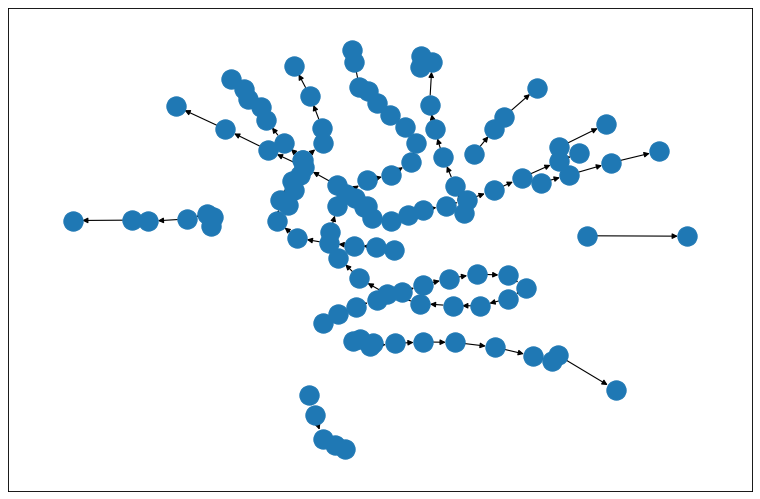

In [43]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
nx.draw_networkx(contig_graph, arrows=True, with_labels=False)

In [44]:
indegree_dict = dict(contig_graph.in_degree())
# indegree_dict

In [45]:
adj_list = {}
for source_node_key in indegree_dict:
    if indegree_dict[source_node_key] == 0:
        adj_list[source_node_key] = []
        next_neighbor_temp = source_node_key
        while(1):
            next_neighbor_temp = list(contig_graph.neighbors(next_neighbor_temp))
            if len(next_neighbor_temp) > 0:
                next_neighbor_temp = next_neighbor_temp[0]
                adj_list[source_node_key].append(next_neighbor_temp)
            else:
                break;

In [46]:
# adj_list

In [47]:
# list(gene_position.ContigName)

In [48]:
# pangraph.gene2cluster_dict['FHLJBAOL_00001_0_1@390@+']

In [49]:
def flatten(l):
    if len(l) == 1:
        return l[0]
    else:
        return [item for sublist in l for item in sublist]
def remove_duplicate(your_list):
    return ([v for i, v in enumerate(your_list) if i == 0 or v != your_list[i-1]])

In [50]:
## neu ko la adjacent thi bat dau bang contigs moi.
adj_list_assembly = {}
for key in adj_list:
    new_key = key
    path1 = adj_list[key].copy()
    path1.insert(0, key)
    path2 = [new_key + pangraph.strand[new_key]]
    for i in range(len(path1)-1):
        src = path1[i] + pangraph.strand[path1[i]]
        dst = path1[i+1] + pangraph.strand[path1[i+1]]
        if not assembly_graph.has_node(src):
            path2.append(src)
        elif not assembly_graph.has_node(dst):
            path2.append(src)
            continue
        else:
            # print("Hi, I am here")
            if nx.has_path(assembly_graph, src, dst):
                paths = [p for p in nx.all_shortest_paths(assembly_graph, src, dst)]
                for node in paths[-1]:
                    path2.append(node)
                # paths = list(nx.all_simple_paths(assembly_graph, source=src, target=dst, cutoff=12))
                # max_path_id = 0
                # for idx in range(1, len(paths)):
                #     if len(paths[idx]) > len(paths[max_path_id]):
                #         max_path_id = idx
                # for node in paths[max_path_id]:
                #     path2.append(node)
            else:
                # print(src, dst,"___", paths[0])    
                path2.append(src)       
                print("Will test this, Ok?")
                # # construct a new path if they are disconnected on the graph
                # if len(path2) > 0:
                #     adj_list_assembly[new_key+pangraph.strand[new_key]] = remove_duplicate(path2)
                # new_key = dst[0:-1]
                # path2 = []           
    if dst not in path2:
        # print(path2)
        path2.append(dst)
    if len(path2) > 0:
        adj_list_assembly[new_key+pangraph.strand[new_key]] = remove_duplicate(path2)

Will test this, Ok?
Will test this, Ok?


In [51]:
# adj_list

In [52]:
# adj_list_assembly
for key in adj_list_assembly:
    for elem in adj_list_assembly[key]:
        print(elem[5:8], end='')
        print(elem[-1], end=',')
    print('')

74_+,79_+,90_-,103-,
15_-,21_-,34_+,65_+,
89_-,119-,135+,68_-,83_-,110-,241-,97_-,246-,39_-,46_+,48_-,120-,
3_l+,24_-,32_-,42_-,47_-,56_-,302-,35_-,113-,127-,38_-,
5_l-,27_+,6_l+,86_-,8_l-,33_+,55_+,54_+,63_+,377+,11_+,29_-,98_-,100+,28_+,116+,127-,45_-,99_-,319+,25_+,53_-,69_+,80_+,111-,149-,136-,16_-,117-,124+,57_-,71_-,75_-,77_-,91_-,96_-,143-,100-,69_-,
78_+,121-,226+,61_+,170+,18_+,114+,4_l-,41_+,
12_-,26_-,13_-,89_+,10_+,14_+,43_+,52_+,
64_+,327+,20_+,
37_+,294+,7_l-,60_-,82_+,85_-,
22_+,62_-,104-,84_-,87_-,94_-,73_-,136-,49_-,59_-,66_-,70_+,72_-,
9_l+,106-,413-,88_-,92_-,95_-,108-,101-,102-,105-,112-,377+,1_l+,76_-,
40_+,217+,30_-,51_+,377+,17_+,93_-,352+,36_+,2_l-,31_+,377+,23_-,58_-,67_-,126-,50_-,
81_-,99_+,19_-,


In [53]:
# adj_list_assembly

In [54]:
from pangraph.utils import generate_fasta_from_dict
# gene_origin = generate_fasta_from_dict(gene, adj_list_assembly, 'all')
gene_origin = generate_fasta_from_dict(gene, adj_list_assembly, 'partial')

In [55]:
# for key in gene_origin:
#     print(key)

In [56]:
# adj_list_assembly

In [57]:
# for key in gene_origin:
#     print(key)

In [58]:
# gene_subset = {'key': gene_origin['NODE_42_length_31236_cov_19.001219']}
# gene_subset = {'key': gene_origin['NODE_13_length_181283_cov_16.175556'] + gene_origin['NODE_18_length_129509_cov_16.103824']+ 
#                gene_origin['NODE_30_length_36239_cov_15.760523']+ gene_origin['NODE_44_length_1445_cov_94.411988'] + 
#                gene_origin['NODE_33_length_31380_cov_15.396410']+ gene_origin['NODE_9_length_214478_cov_15.967838']}

In [59]:
# write_fasta(gene_origin, "/data/hoan/amromics/simulation/art_output/spades_output/contigs_concat_weight_path.fasta")
# write_fasta(gene_origin, "/data/hoan/amromics/simulation/art_output/spades_output/contigs_concat.fasta")
spades_output = '/data/hoan/amromics/simulation/art_output/spades_output'+simversion+'/contigs.fasta'
gr_output_union_opt = '/data/hoan/amromics/simulation/art_output/spades_output'+simversion+'/contigs_concat.fasta'
gr_output_union_greedy = '/data/hoan/amromics/simulation/art_output/spades_output'+simversion+'/contigs_concat_greedy.fasta'
gr_output_new = '/data/hoan/amromics/simulation/art_output/spades_output'+simversion+'/contigs_concat_new.fasta'
output_dir = gr_output_new
# write_fasta(gene_subset, output_dir)
write_fasta(gene_origin, output_dir)
print(output_dir)

Success! File written
/data/hoan/amromics/simulation/art_output/spades_output_Ecoli100random_plasmid_v01/contigs_concat_new.fasta


### Quast 

In [60]:
if True:
    quast_bin = 'python /data/hoan/amromics/spades_quast/quast-5.2.0/quast.py '
    quast_output = '/data/hoan/amromics/genome-graph/scaffold_output/quastResults_Kp100random_v01'
    ref_genome = '/data/hoan/amromics/simulation/references/GCF_000240185.1_ASM24018v2_genomic.fasta'
    # multicsar_output = '/data/hoan/amromics/genome-graph/scaffold_output/multicsar/multi-csar.nuc.out.fna '
    # ragout_output = '/data/hoan/amromics/assembly/Ragout/output_Kp100p_v3/mg1655_scaffolds.fasta '
    # os.system(quast_bin + gr_output_union_opt+' '+ gr_output_union_greedy+' '+ gr_output_new+' ' + multicsar_output+ ragout_output+ spades_output+' '+
              # '-l "Pangraph_OPT, Pangraph_Greedy, Pangraph_New, Multi-CSAR, Ragout, SPADES" '+ '-r '+ref_genome+' -o '+ quast_output+' --silent --extensive-mis-size 5000 --local-mis-size 3000')
    os.system(quast_bin +  gr_output_new + ' '+
    '-l "Pangraph" '+ '-r '+ref_genome+' -o '+ quast_output+' --silent --extensive-mis-size 5000 --local-mis-size 3000')

/data/hoan/amromics/spades_quast/quast-5.2.0/quast.py /data/hoan/amromics/simulation/art_output/spades_output_Ecoli100random_plasmid_v01/contigs_concat_new.fasta -l Pangraph -r /data/hoan/amromics/simulation/references/GCF_000240185.1_ASM24018v2_genomic.fasta -o /data/hoan/amromics/genome-graph/scaffold_output/quastResults_Kp100random_v01 --silent --extensive-mis-size 5000 --local-mis-size 3000


System information:
  OS: Linux-3.10.0-1160.15.2.el7.x86_64-x86_64-with-redhat-7.9-Nitrogen (linux_64)
  Python version: 2.7.5
  CPUs number: 72

Started: 2022-12-22 07:18:05

Logging to /data/hoan/amromics/genome-graph/scaffold_output/quastResults_Kp100random_v01/quast.log
NOTICE: Output directory already exists and looks like a QUAST output dir. Existing results can be reused (e.g. previously generated alignments)!
NOTICE: Maximum number of threads is set to 18 (use --threads option to set it manually)

CWD: /data/hoan/amromics/genome-graph
Main parameters: 
  MODE: default, threads: 18, min

Unable to parse the pattern
Unable to parse the pattern
Unable to parse the pattern


Done.

2022-12-22 07:18:07
Running Contig analyzer...
Done.

2022-12-22 07:18:10
Running NA-NGA calculation...
Done.

2022-12-22 07:18:10
Running Genome analyzer...
  NOTICE: No file with genomic features were provided. Use the --features option if you want to specify it.

  NOTICE: No file with operons were provided. Use the -O option if you want to specify it.
Done.

NOTICE: Genes are not predicted by default. Use --gene-finding or --glimmer option to enable it.

2022-12-22 07:18:11
Creating large visual summaries...
This may take a while: press Ctrl-C to skip this step..
  1 of 2: Creating PDF with all tables and plots...
  2 of 2: Creating Icarus viewers...
Done

2022-12-22 07:18:13
RESULTS:
  Text versions of total report are saved to /data/hoan/amromics/genome-graph/scaffold_output/quastResults_Kp100random_v01/report.txt, report.tsv, and report.tex
  Text versions of transposed total report are saved to /data/hoan/amromics/genome-graph/scaffold_output/quastResults_Kp100random_v01

In [61]:
a = []

In [62]:
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [63]:
similar("12_43_5_6","12_43_5_9")

0.8888888888888888